In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
list.files(path = "../input")

[1] "heart-disease-cleveland-uci"

In [3]:
library(tidyverse)
library(dslabs)
library(dplyr)
library(caret)
library(lubridate)
library(tidytext)
library("RColorBrewer")
library(randomForest)
library(tictoc)
library(e1071)
library(ggpubr)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [4]:
hdd <- read_csv("../input/heart-disease-cleveland-uci/heart_cleveland_upload.csv")

Rows: 297 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
hdd %>% head()

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
64,1,0,170,227,0,2,155,0,0.6,1,0,2,0


In [6]:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_double(),
  thal = col_double(),
  condition = col_double()
)

cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_double(),
  thal = col_double(),
  condition = col_double()
)

**Data Visualization**

In [7]:
hdd %>% summarise(n_age = n_distinct(age), n_sex = n_distinct(sex),
                  n_cp = n_distinct(cp), n_trestbps = n_distinct(trestbps),
                  n_chol = n_distinct(chol), n_fbs = n_distinct(fbs),
                  n_restecg = n_distinct(restecg), n_thalach = n_distinct(thalach),
                  n_exang = n_distinct(exang), n_oldpeak = n_distinct(oldpeak),
                  n_slope = n_distinct(slope), n_ca = n_distinct(ca), n_thal = n_distinct(thal),
                  n_condition = n_distinct(condition))

n_age,n_sex,n_cp,n_trestbps,n_chol,n_fbs,n_restecg,n_thalach,n_exang,n_oldpeak,n_slope,n_ca,n_thal,n_condition
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
41,2,4,50,152,2,3,91,2,40,3,4,3,2


**Creating a disease distribution for age**
\n 
0 <- No Disease
1 <- Disease

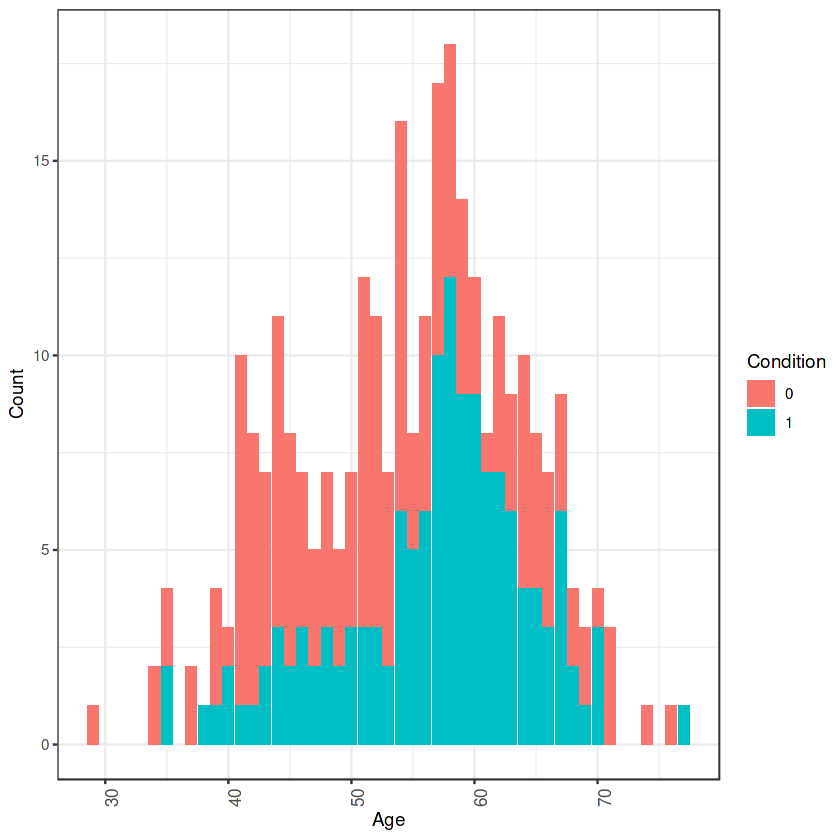

In [8]:
hdd %>% group_by(age, condition) %>% summarise(count = n(), .groups = "keep") %>% ggplot() + geom_bar(aes(age, count,  
        fill = as.factor(condition)), stat = "Identity") + theme_bw() + theme(axis.text.x = element_text(angle = 90, size = 10)) + 
        ylab("Count") + xlab("Age") + labs(fill = "Condition")

**Data Distribution for Chest Pain type for diseased people**

`summarise()` has grouped output by 'age'. You can override using the `.groups`
argument.


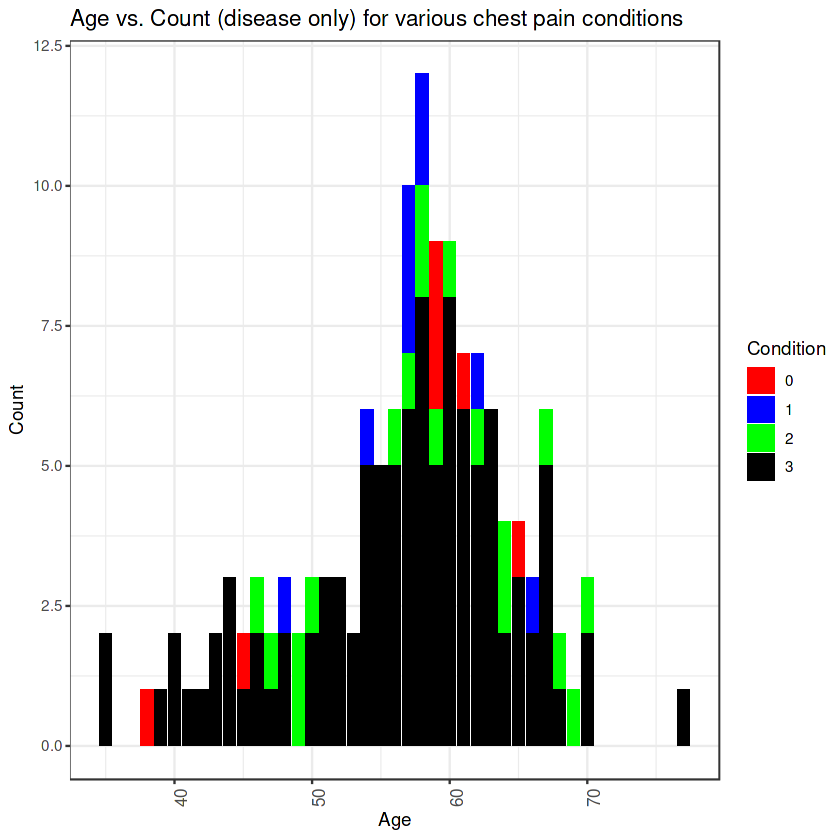

In [9]:
hdd %>% filter(condition == 1) %>% group_by(age, cp) %>% summarise(count = n()) %>%
      ggplot() + geom_bar(aes(age, count,   fill = as.factor(cp)),stat = "Identity") +
      theme_bw() +
      theme(axis.text.x = element_text(angle = 90, size = 10)) + 
      ylab("Count") + xlab("Age") + labs(fill = "Condition") + 
      ggtitle("Age vs. Count (disease only) for various chest pain conditions") +
      scale_fill_manual(values=c("red", "blue", "green", "black"))

Analysis:
* Majority of individuals within data set have condition type 3
* 0: Typical Angina
* 1: Atypical Angina
* 2: Non-anginal pain
* 3: Asymptopmatic




**Visualize Data Condition based on Sex**

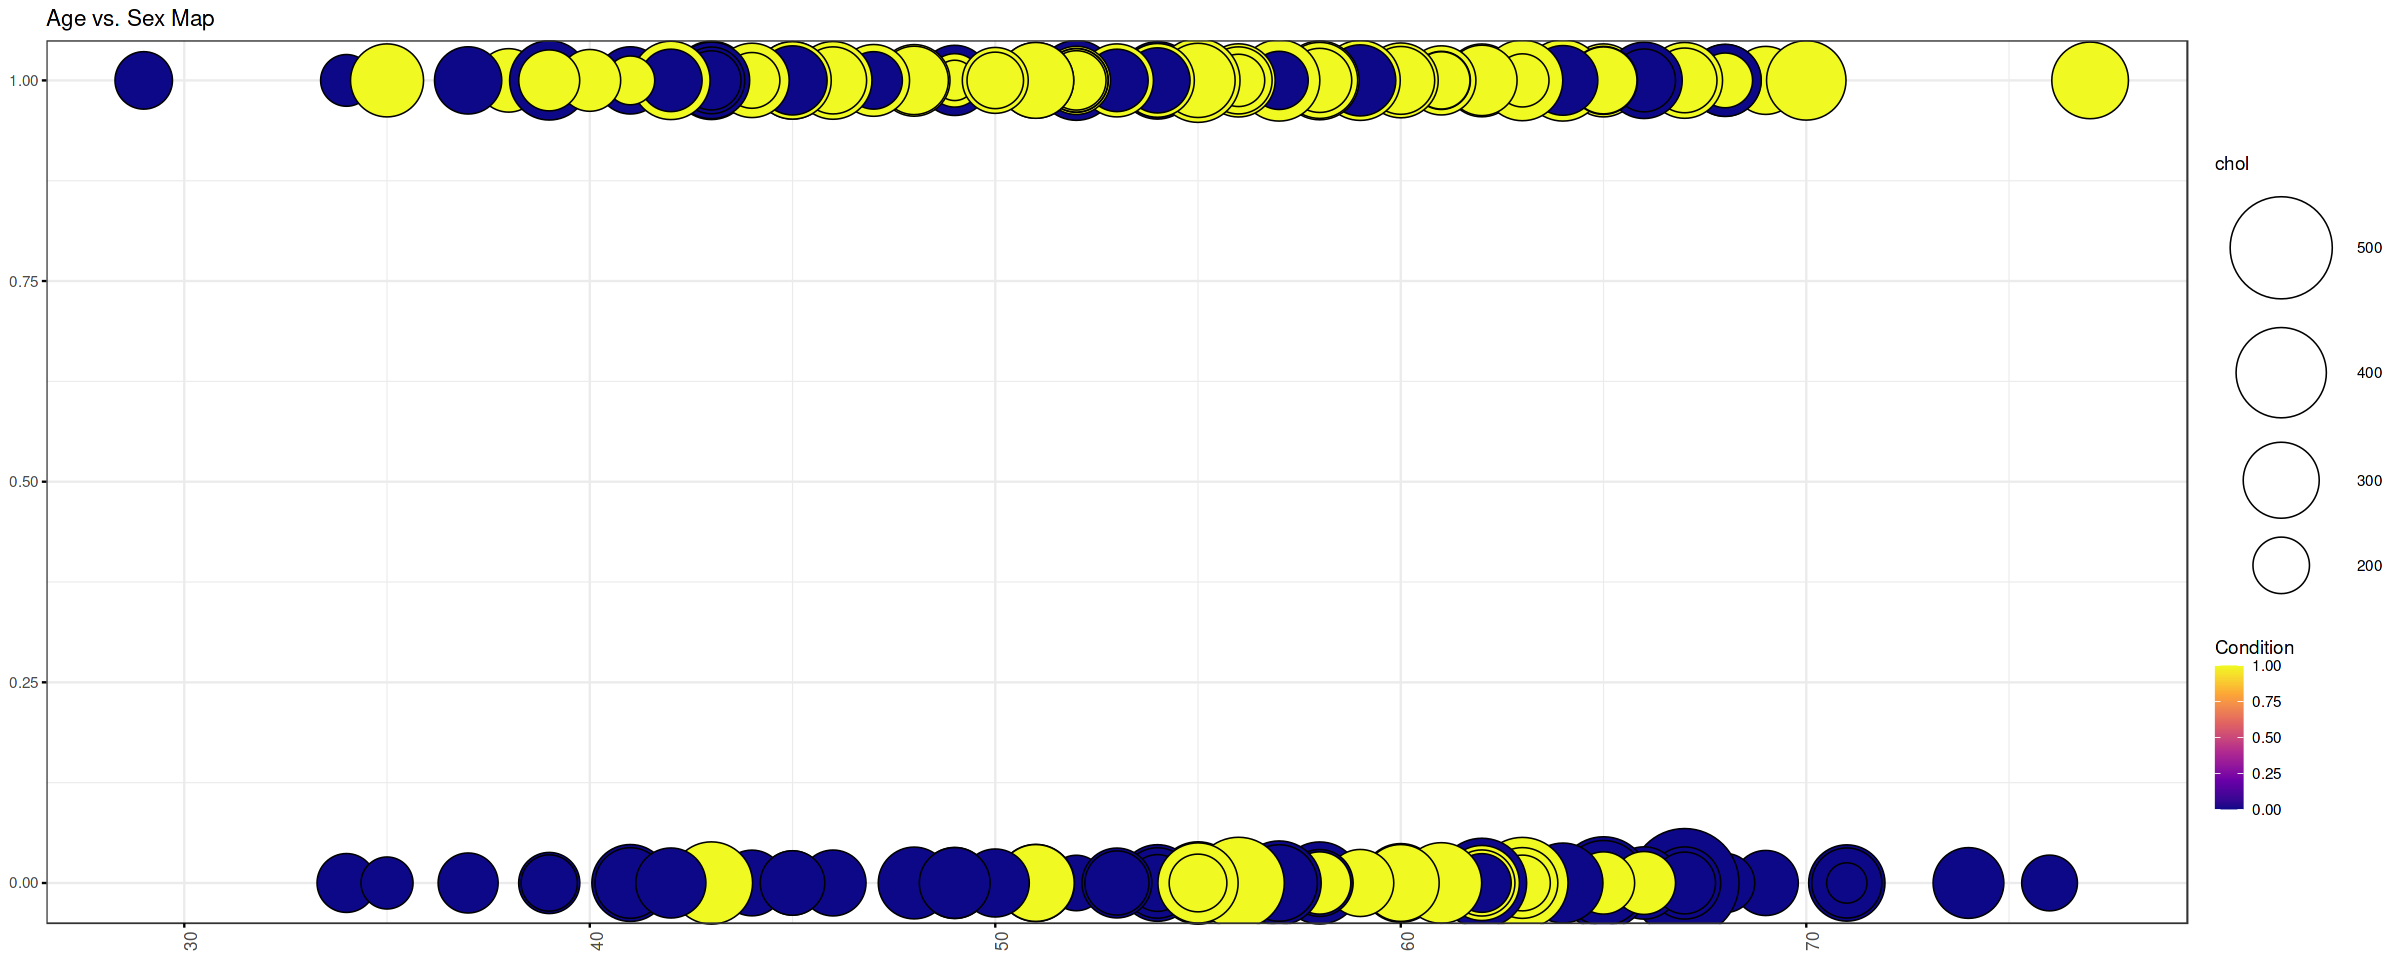

In [10]:
options(repr.plot.width = 20, repr.plot.height = 8) 

hdd %>% ggballoonplot(x = "age", y = "sex",
      size = "chol", size.range = c(5, 30), fill = "condition",show.label = FALSE,
      ggtheme = theme_bw()) +
      scale_fill_viridis_c(option = "C") + 
      theme(axis.text.x = element_text(angle = 90, size = 10)) +
      ggtitle("Age vs. Sex Map") + labs(fill = "Condition")

Age is on the X axis, Sex is on the Y axis (0: Female, 1: Male), size of the circle is the chloestrol level, and the color is the condition. Yellow indicates disease and blue does not indicate disease. Each circle represents one datapoint on the .csv file. 

More male count than female count; more male disease than female; disease has direct proportionality relationship with higher cholestrol values

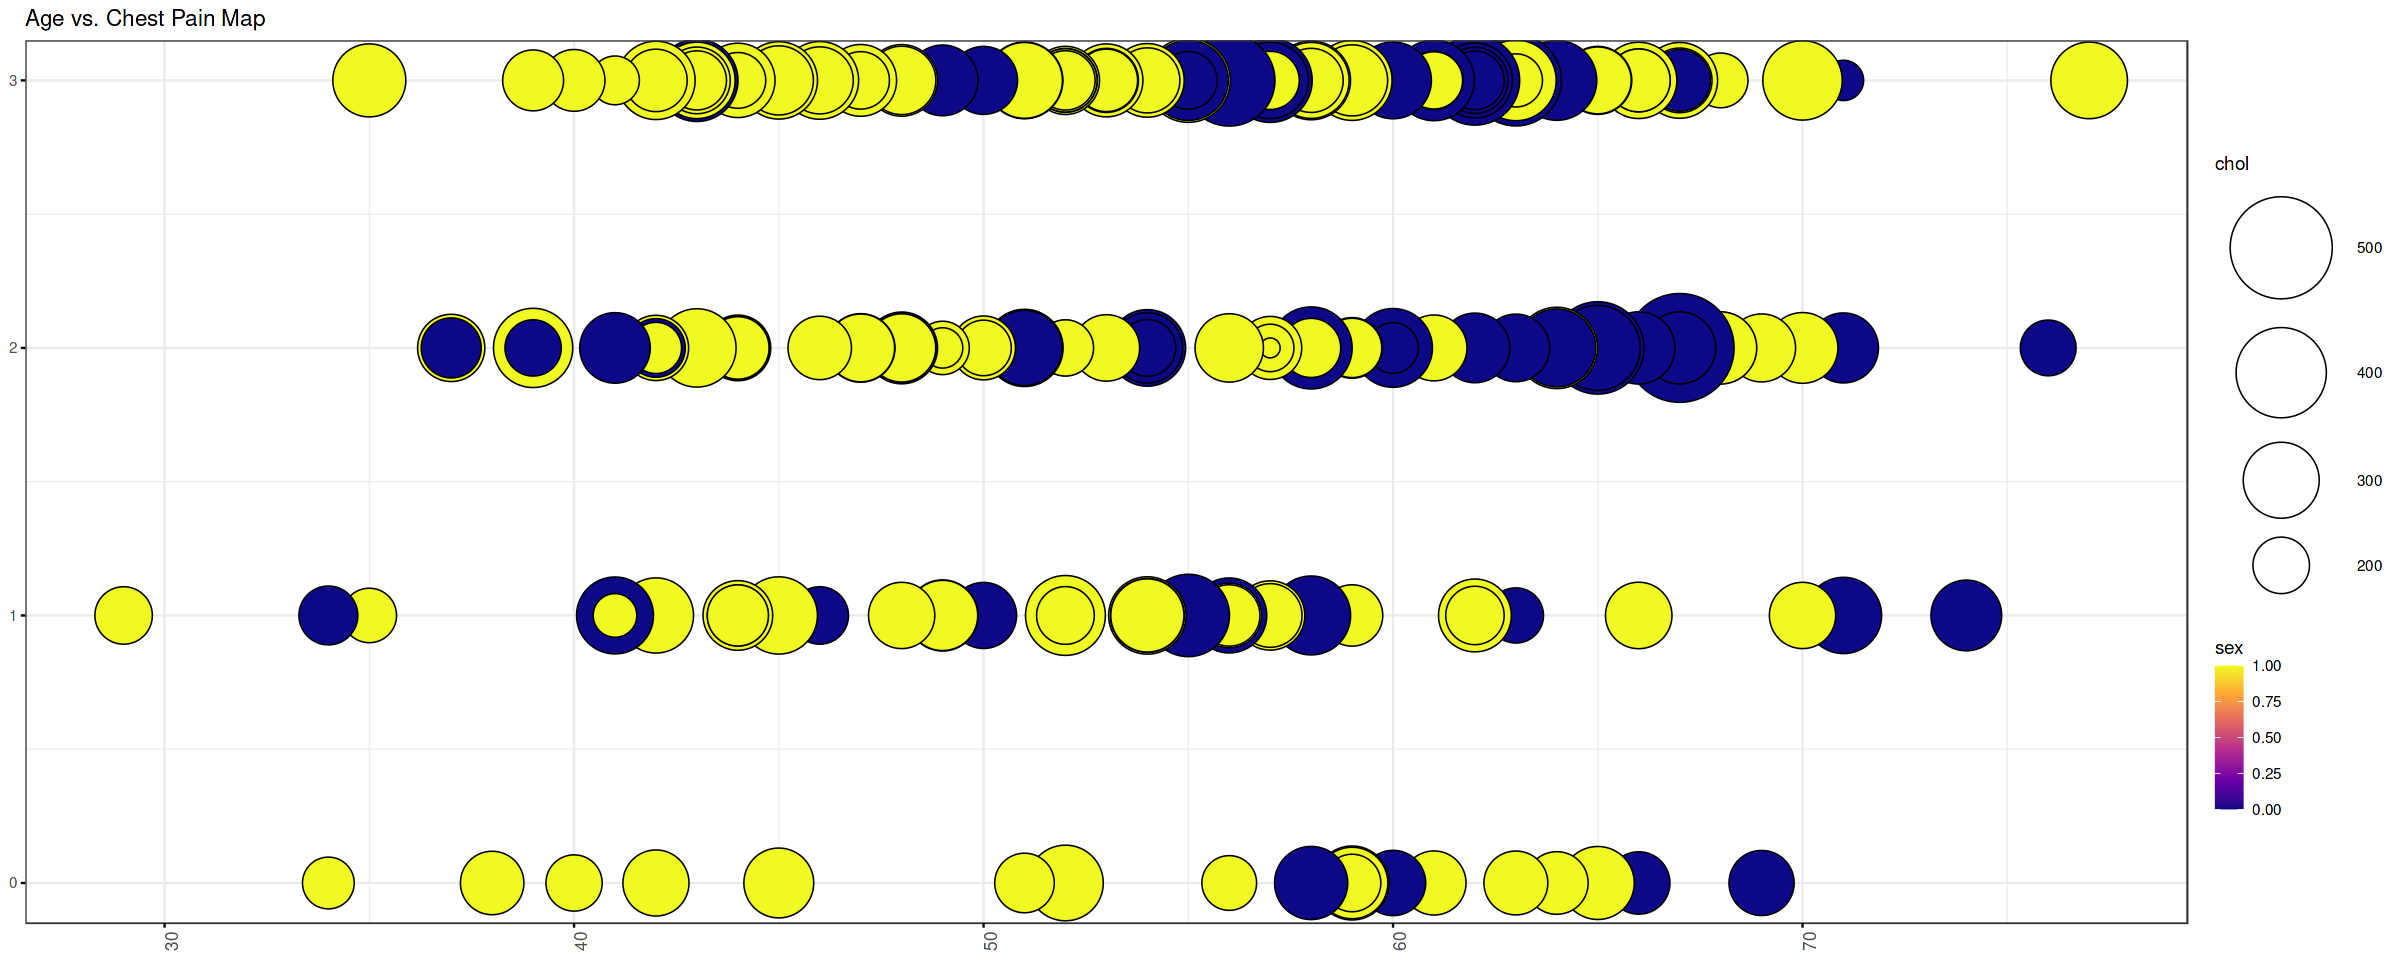

In [11]:
options(repr.plot.width = 20, repr.plot.height = 8) 

hdd %>% ggballoonplot(x = "age", y = "cp",
      size = "chol", size.range = c(5, 30), fill = "sex",show.label = FALSE,
      ggtheme = theme_bw()) +
      scale_fill_viridis_c(option = "C") + 
      theme(axis.text.x = element_text(angle = 90, size = 10)) +
      ggtitle("Age vs. Chest Pain Map") + labs(fill = "sex")

Y-axis represents chest pain type and color is representative of sex rather than condition

**Disease Prediction (ML)**

The analyis below shows the disease prediction using various ML algorithms. The outcome has been defined to be a binary classification variable, and several classification algorithms have been used to predict the accuracy. This is just a comparison study and the reasoning behind the usage of these algorithms has not been the focus of this study. The list are shown below

* Linear Discriminamt Analaysis (LDA)
* Quadrant Discriminant Analysis (QDA)
* Knn
* SVM
* RF
* GBM

**Training the machine learning algorithm to validate and predict data accurately**

In [12]:
set.seed(2020, sample.kind = "Rounding")
# Divide into train and validation dataset
test_index <- createDataPartition(y = hdd$condition, times = 1, p = 0.2, list= FALSE)
train_set <- hdd[-test_index, ]
validation <- hdd[test_index, ]

# Converting the dependent variables to factors
train_set$condition <- as.factor(train_set$condition)
validation$condition <- as.factor(validation$condition)

Warning message in set.seed(2020, sample.kind = "Rounding"):
“non-uniform 'Rounding' sampler used”


**LDA**

In [13]:
lda_fit <- train(condition ~ ., method = "lda", data = train_set)
lda_predict <- predict(lda_fit, validation)
confusionMatrix(lda_predict, validation$condition)
            


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 28  5
         1  1 26
                                          
               Accuracy : 0.9             
                 95% CI : (0.7949, 0.9624)
    No Information Rate : 0.5167          
    P-Value [Acc > NIR] : 2.349e-10       
                                          
                  Kappa : 0.8007          
                                          
 Mcnemar's Test P-Value : 0.2207          
                                          
            Sensitivity : 0.9655          
            Specificity : 0.8387          
         Pos Pred Value : 0.8485          
         Neg Pred Value : 0.9630          
             Prevalence : 0.4833          
         Detection Rate : 0.4667          
   Detection Prevalence : 0.5500          
      Balanced Accuracy : 0.9021          
                                          
       'Positive' Class : 0               
                                    

**QDA**

In [14]:
qda_fit <- train(condition ~ ., method = "qda", data = train_set)
qda_predict <- predict(qda_fit, validation)
confusionMatrix(qda_predict, validation$condition)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 26  5
         1  3 26
                                          
               Accuracy : 0.8667          
                 95% CI : (0.7541, 0.9406)
    No Information Rate : 0.5167          
    P-Value [Acc > NIR] : 1.105e-08       
                                          
                  Kappa : 0.7336          
                                          
 Mcnemar's Test P-Value : 0.7237          
                                          
            Sensitivity : 0.8966          
            Specificity : 0.8387          
         Pos Pred Value : 0.8387          
         Neg Pred Value : 0.8966          
             Prevalence : 0.4833          
         Detection Rate : 0.4333          
   Detection Prevalence : 0.5167          
      Balanced Accuracy : 0.8676          
                                          
       'Positive' Class : 0               
                                    

**KNN (K-Nearest-Neighbor) Classifier**

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 29  6
         1  0 25
                                          
               Accuracy : 0.9             
                 95% CI : (0.7949, 0.9624)
    No Information Rate : 0.5167          
    P-Value [Acc > NIR] : 2.349e-10       
                                          
                  Kappa : 0.8011          
                                          
 Mcnemar's Test P-Value : 0.04123         
                                          
            Sensitivity : 1.0000          
            Specificity : 0.8065          
         Pos Pred Value : 0.8286          
         Neg Pred Value : 1.0000          
             Prevalence : 0.4833          
         Detection Rate : 0.4833          
   Detection Prevalence : 0.5833          
      Balanced Accuracy : 0.9032          
                                          
       'Positive' Class : 0               
                                    

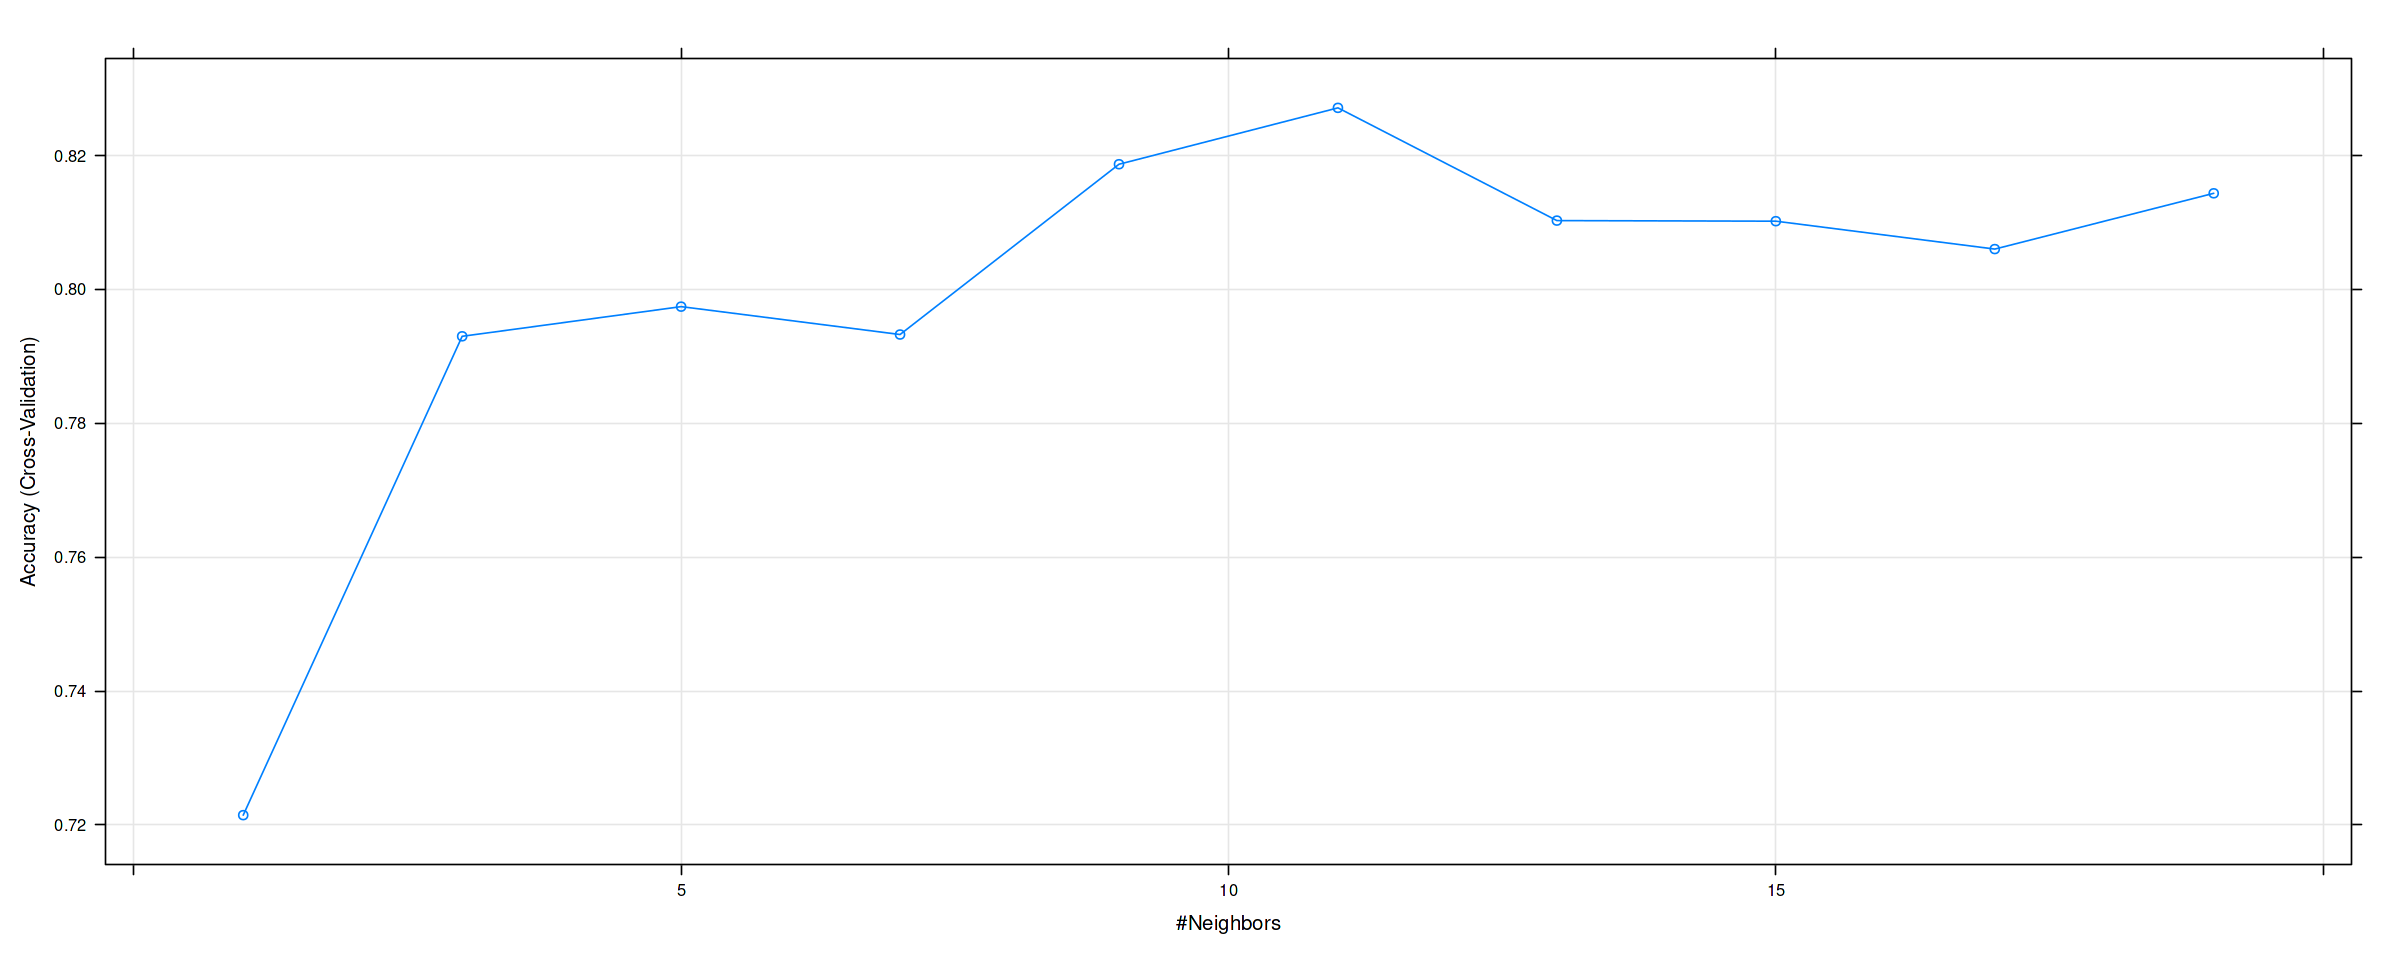

In [15]:
ctrl <- trainControl(method = "cv", verboseIter = FALSE, number = 5)
knnFit <- train(condition ~ ., 
                data = train_set, method = "knn", preProcess = c("center","scale"),
                trControl = ctrl , tuneGrid = expand.grid(k = seq(1, 20, 2)))

plot(knnFit)
toc()

knnPredict <- predict(knnFit,newdata = validation )
knn_results <- confusionMatrix(knnPredict, validation$condition )

knn_results

**SVM**

 Total time for SVM :: : 2.765 sec elapsed


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 29  5
         1  0 26
                                          
               Accuracy : 0.9167          
                 95% CI : (0.8161, 0.9724)
    No Information Rate : 0.5167          
    P-Value [Acc > NIR] : 2.677e-11       
                                          
                  Kappa : 0.8341          
                                          
 Mcnemar's Test P-Value : 0.07364         
                                          
            Sensitivity : 1.0000          
            Specificity : 0.8387          
         Pos Pred Value : 0.8529          
         Neg Pred Value : 1.0000          
             Prevalence : 0.4833          
         Detection Rate : 0.4833          
   Detection Prevalence : 0.5667          
      Balanced Accuracy : 0.9194          
                                          
       'Positive' Class : 0               
                                    

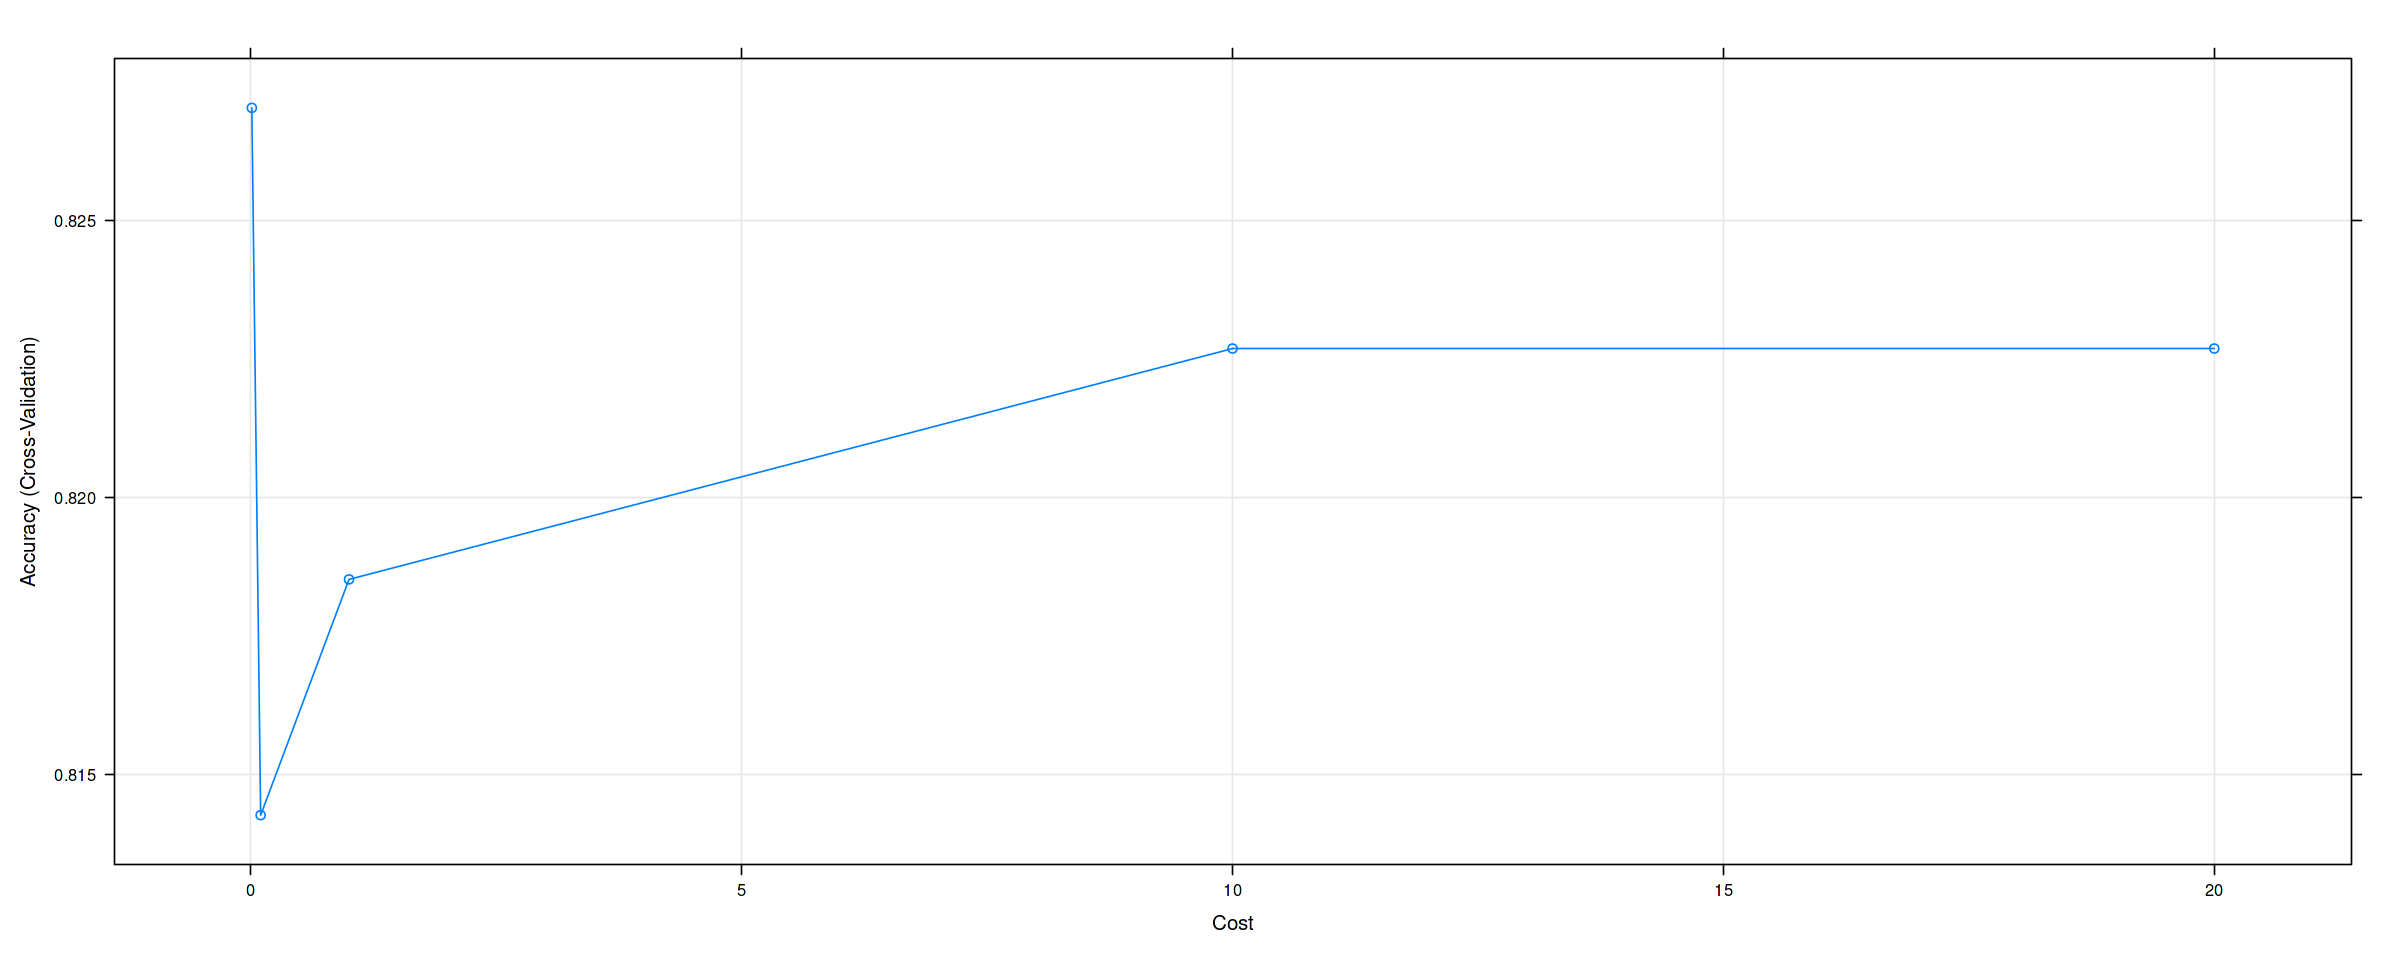

In [16]:
ctrl <- trainControl(method = "cv", verboseIter = FALSE, number = 5)

grid_svm <- expand.grid(C = c(0.01, 0.1, 1, 10, 20))

tic(msg= " Total time for SVM :: ")
svm_fit <- train(condition ~ .,data = train_set,
                 method = "svmLinear", preProcess = c("center","scale"),
                 tuneGrid = grid_svm, trControl = ctrl)

plot(svm_fit)
toc()
svm_predict <- predict(svm_fit, newdata = validation)
svm_results <- confusionMatrix(svm_predict, validation$condition)

svm_results

**RF**

 Total time for rf :: : 0.445 sec elapsed


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 27  7
         1  2 24
                                         
               Accuracy : 0.85           
                 95% CI : (0.7343, 0.929)
    No Information Rate : 0.5167         
    P-Value [Acc > NIR] : 6.136e-08      
                                         
                  Kappa : 0.7013         
                                         
 Mcnemar's Test P-Value : 0.1824         
                                         
            Sensitivity : 0.9310         
            Specificity : 0.7742         
         Pos Pred Value : 0.7941         
         Neg Pred Value : 0.9231         
             Prevalence : 0.4833         
         Detection Rate : 0.4500         
   Detection Prevalence : 0.5667         
      Balanced Accuracy : 0.8526         
                                         
       'Positive' Class : 0              
                                         

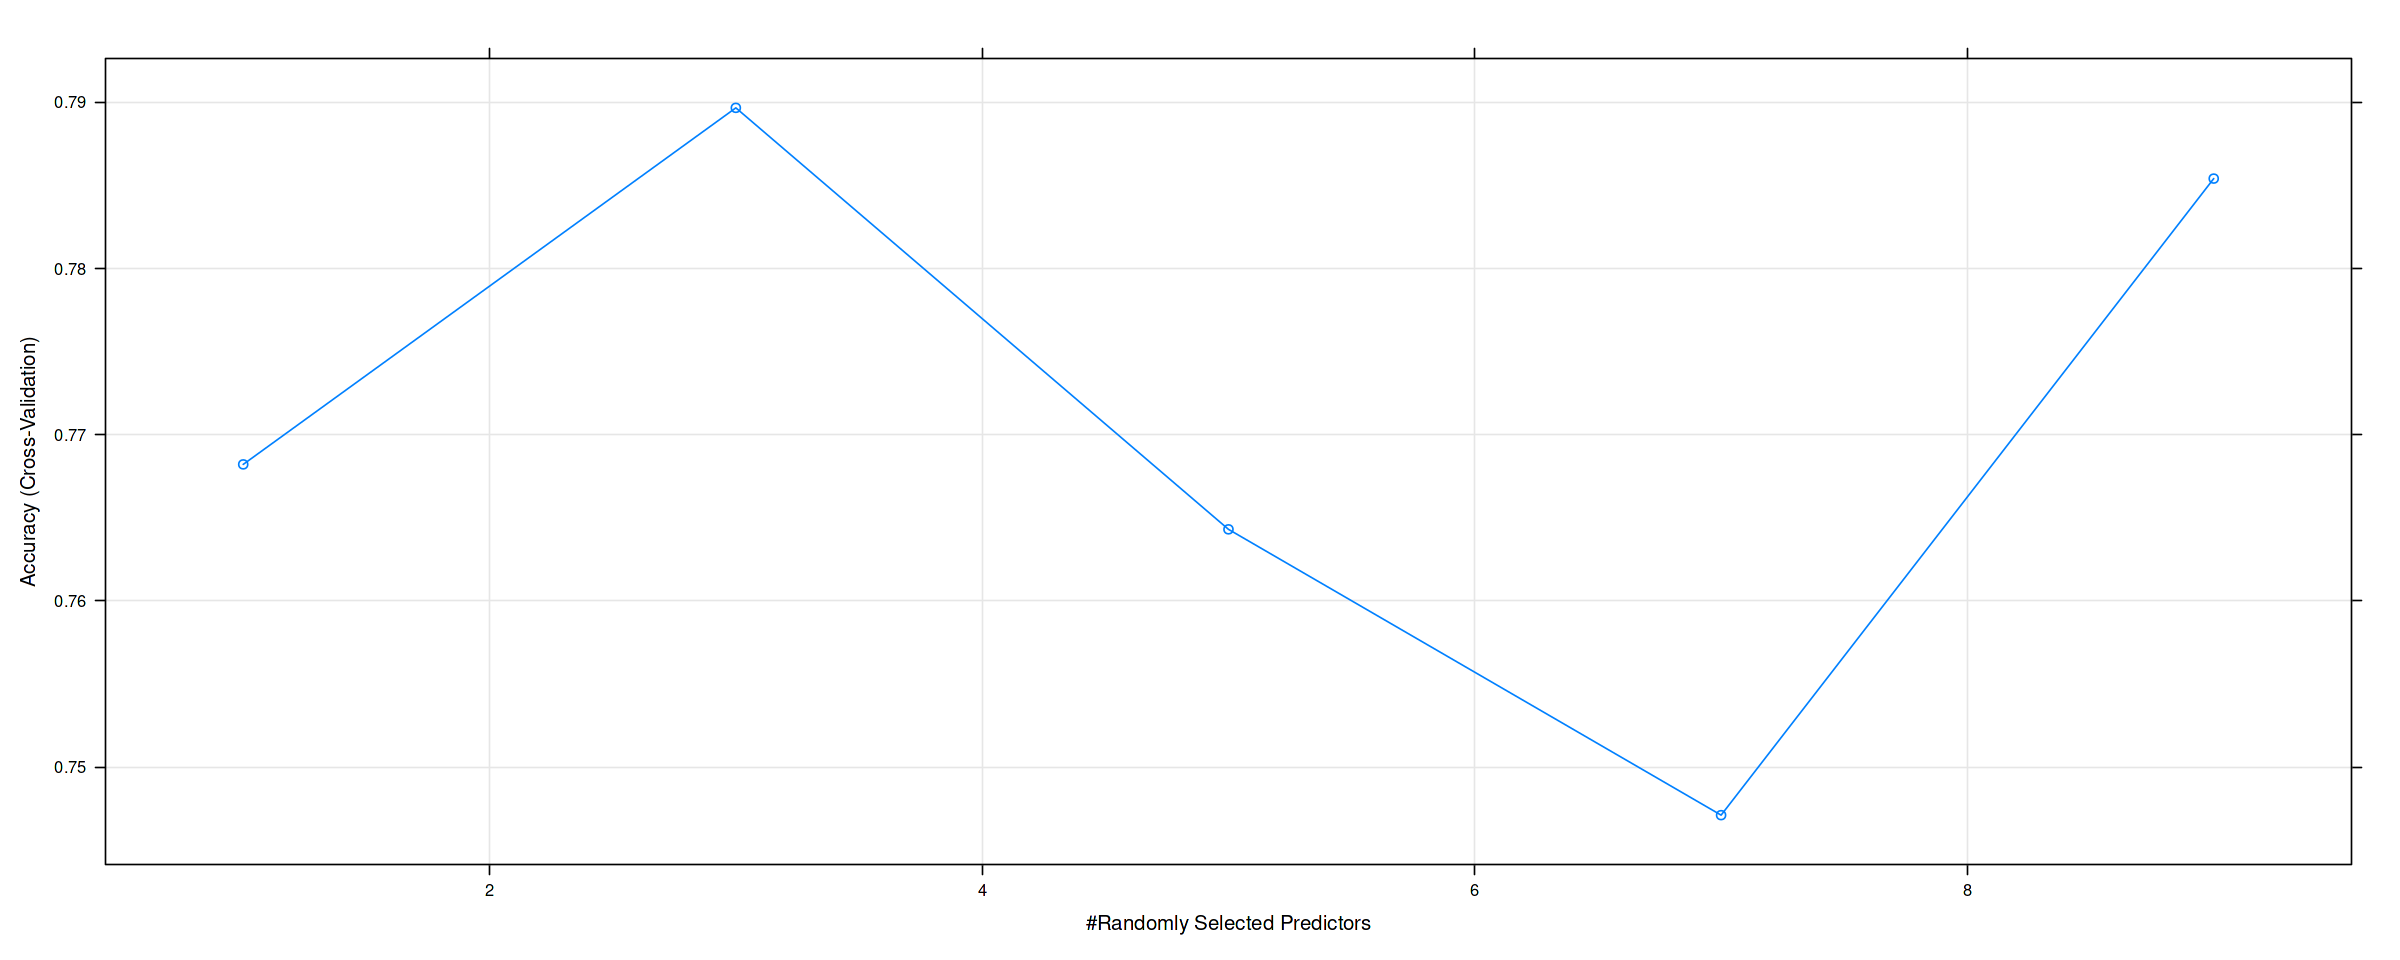

In [17]:
############################
# RF
############################
control<- trainControl(method = "cv", number = 5, verboseIter = FALSE)
grid <-data.frame(mtry = seq(1, 10, 2))
tic(msg= " Total time for rf :: ")
rf_fit <- train(condition ~ ., method = "rf", data = train_set, ntree = 20, trControl = control,
                  tuneGrid = grid)

plot(rf_fit)
toc()
rf_predict <- predict(rf_fit, newdata = validation)

rf_results <- confusionMatrix(rf_predict, validation$condition)

rf_results

**GBM**

 Total time for GBM :: : 4.004 sec elapsed


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 28  6
         1  1 25
                                          
               Accuracy : 0.8833          
                 95% CI : (0.7743, 0.9518)
    No Information Rate : 0.5167          
    P-Value [Acc > NIR] : 1.737e-09       
                                          
                  Kappa : 0.7677          
                                          
 Mcnemar's Test P-Value : 0.1306          
                                          
            Sensitivity : 0.9655          
            Specificity : 0.8065          
         Pos Pred Value : 0.8235          
         Neg Pred Value : 0.9615          
             Prevalence : 0.4833          
         Detection Rate : 0.4667          
   Detection Prevalence : 0.5667          
      Balanced Accuracy : 0.8860          
                                          
       'Positive' Class : 0               
                                    

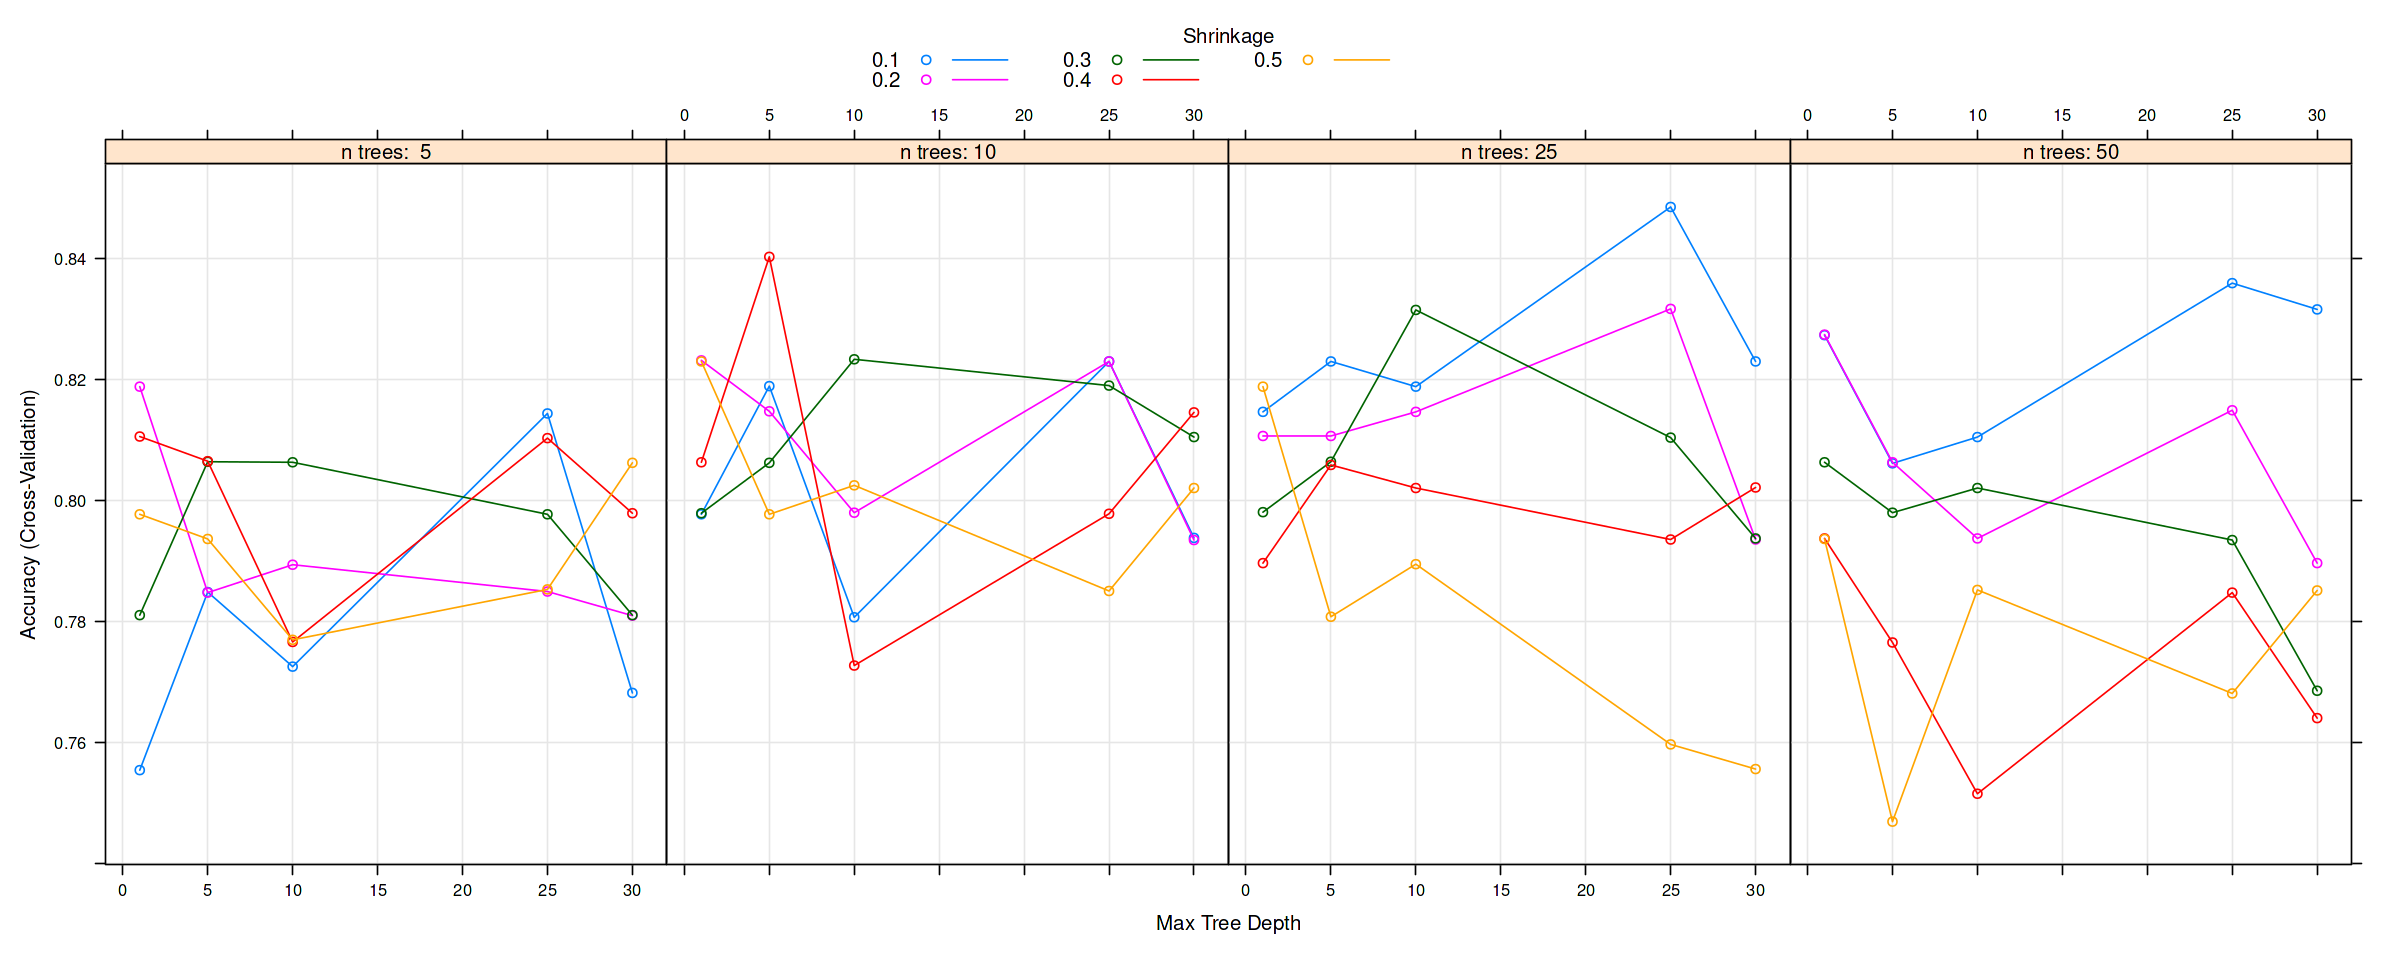

In [18]:
gbmGrid <-  expand.grid(interaction.depth = c(1, 5, 10, 25, 30),
                        n.trees = c(5, 10, 25, 50),
                        shrinkage = c(0.1, 0.2, 0.3,  0.4, 0.5),
                        n.minobsinnode = 20)

tic(msg= " Total time for GBM :: ")
gbm_fit <- train(condition ~ ., method = "gbm", data = train_set,  trControl = control, verbose = FALSE,
                   tuneGrid = gbmGrid)

plot(gbm_fit)
toc()
gbm_predict <- predict(gbm_fit, newdata = validation)

gbm_results <- confusionMatrix(gbm_predict, validation$condition)

gbm_results
